In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV f i l e
data = pd.read_csv ('bivariate_linear_regression_data.csv')

In [42]:
#Initialise
X1 = data ['X1']
X2 = data ['X2']
y = data ['y']

# Normalize the f e at u r e s and t a r g e t
X1 = (X1 - np.mean(X1 ) ) / np.std(X1 )
X2 = (X2 - np.mean(X2 ) ) / np.std(X2 )
y = ( y -  np.mean(y ) ) /  np.std(y  )

#Hessian
m = len(X1)
H = (1/m)*np.array([
    [np.sum(X1**2), np.sum(X1 * X2), np.sum(X1)],
    [np.sum(X1 * X2), np.sum(X2**2), np.sum(X2)],
    [np.sum(X1)   , np.sum(X2)     , m         ]])

#Check
rank_H = np.linalg.matrix_rank(H)

if rank_H == H.shape[0]:
    print("True the matrix H invertible")
else:
    Print("False the matrix H invertible")

True the matrix H invertible


In [43]:
#Initialise
X1 = data ['X1']
X2 = data ['X2']
y = data ['y']

# Normalize the f e at u r e s and t a r g e t
X1 = (X1 - np.mean(X1 ) ) / np.std(X1 )
X2 = (X2 - np.mean(X2 ) ) / np.std(X2 )
y = ( y -  np.mean(y ) ) /  np.std(y  )

def gradient_descent(X1,X2,y,t,iterations,w_0):
    w1 = w_0[0]
    w2 = w_0[2]
    b  = w_0[1]
    m = len(y)
    for _ in range(iterations):
        #Calculate the predicted values
        h = w1*X1 + w2*X2 + b
        
        #W1,W2,b
        w1 -= t*1/(m) * np.sum((h - y) * X1)
        w2 -= t*1/(m) * np.sum((h - y) * X2)
        b  -= t*1/(m) * np.sum( h - y)
        
    return w1,w2,b
w_0 = [0,0,0]
iterations = 100
t = 0.1
gradient_descent(X1,X2,y,t,iterations,w_0)

(0.5519267279521582, 0.8318028146962119, 2.7433610938487585e-16)

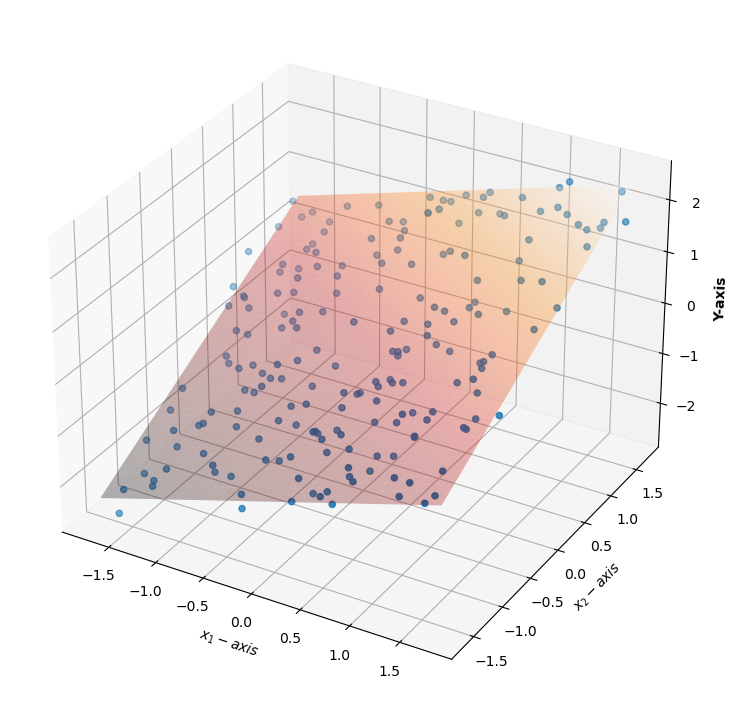

In [44]:
def plot_B_R(X1,X2,y,t,iterations):
    
    w1, w2, b = gradient_descent(X1,X2,y,t,iterations,w_0)

    # Creating figure
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot for data points
    ax.scatter3D(X1, X2, y, marker='o', label='$(x_1, x_2)$')

    # Decision boundary
    x1_range = np.linspace(min(X1), max(X1), 100)
    x2_range = np.linspace(min(X2), max(X2), 100)
    x1_vals, x2_vals = np.meshgrid(x1_range, x2_range)
    y_vals = w1 * x1_vals + w2 * x2_vals + b
    ax.plot_surface(x1_vals, x2_vals, y_vals, alpha=0.3, cmap='gist_heat',label='Decision Boundary')

    ax.set_xlabel('$x_1-axis$', fontweight='bold')
    ax.set_ylabel('$x_2-axis$', fontweight='bold')
    ax.set_zlabel('Y-axis', fontweight='bold')
    
    plt.show()
    
plot_B_R(X1,X2,y,t,iterations)

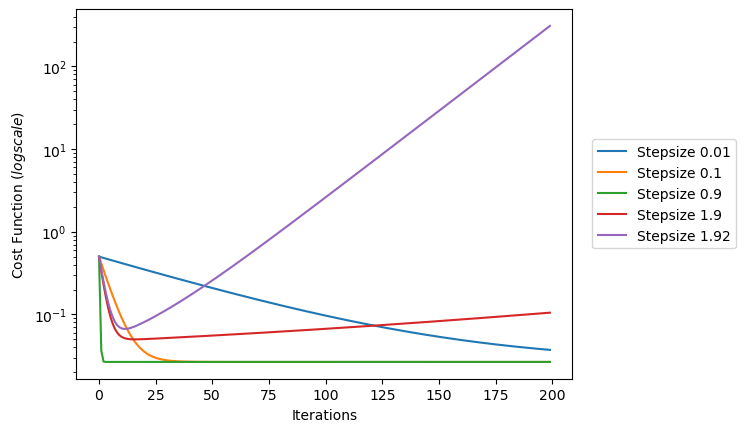

In [14]:
def gradient_descent_cost(X1,X2,y,t,iterations,w_0):
    m = len(y)
    w1 = w_0[0]
    w2 = w_0[2]
    b  = w_0[1]
    cost = []
    for i in range(iteration):
        h = w1 * X1 + w2 * X2 + b
        grad_w1 = (1/m) * np.sum((h - y)*X1)
        grad_w2 = (1/m) * np.sum((h - y)*X2)
        grad_b = (1/m) * np.sum(h - y)
#gradient descent 
        w1 -= t * grad_w1
        w2 -= t * grad_w2
        b -= t * grad_b
#cost
        MSE_cost = (1 / (2 * m)) * np.sum((h - y) ** 2)
        cost.append(MSE_cost)

    return w1, w2, b, cost

#parameter

iteration = 200
stepsizes = [0.01, 0.1, 0.9,1.9,1.92]

#plot

for _ in stepsizes:
    w1, w2, b, cost = gradient_descent_cost(X1,X2,y,_,iterations,w_0)
    plt.plot(range(iteration), cost, label=f'Stepsize {_}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function $(log scale)$')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
plt.show()

In [25]:
# Data
t = np.arange(1,12+1)
temp = np.array([7,8,10,13,17,19,22,21,18,14,10,8])

# Initial
x0 = np.array([5,1,0,10]) 
TOL = 10**(-6)
#n = 10*6

#Function f
def f(x,t):
    #t is time represented in months 1-12
    return x[0]*np.sin(x[1]*t + x[2]) + x[3]

#Jacobian
def Jocobian(x,t):
    Jocobian = np.zeros((len(t),len(x)))
    
    for k in range(0,len(t)):
        Jocobian[k,0] =           np.sin(t[k]*x[1] +x[2])
        Jocobian[k,1] = t[k]*x[0]*np.cos(t[k]*x[1] +x[2]) 
        Jocobian[k,2] =      x[0]*np.cos(t[k]*x[1] +x[2]) 
        Jocobian[k,3] = 1
    return Jocobian

def gradient(x,temp,t):
    F = f(x,t) - temp
    J = Jocobian(x,t)
    grad = (J.T)@F
    return grad

def Hessian(x,t):
    J = Jocobian(x,t)
    Hessian = (J.T)@J
    return Hessian
#Gaus-newtton and the Damping method
def gauss_newtton_or_Damp(x0,temp,t,TOL,Damp):
    i = 0
#Tolerance
    while np.linalg.norm(gradient(x0,temp,t)) >= TOL:
        directional_deriv = np.linalg.solve(Hessian(x0, t),-gradient(x0,temp,t))
#Damping
        if Damp == True:
            x0 = x0 + directional_deriv * min(1, 1 / np.linalg.norm(gradient(x0,temp,t)))
            i+=1
#Pure Gauss-Newtton
        else:
            x0 = x0 + directional_deriv
            i+=1
    print("The for method below the iteration stops at:",i)
    return x0
 
print("\n################################")
print("The Gause-N method gives:", gauss_newtton_or_Damp(x0,temp,t,TOL,Damp=False))
print("\n################################")
print("The Damping Gause-N method gives:", gauss_newtton_or_Damp(x0,temp,t,TOL,Damp=True))
print("\n################################")


################################
The for method below the iteration stops at: 21
The Gause-N method gives: [ -7.11123395 -37.14684239 289.80196669  14.26653269]

################################
The for method below the iteration stops at: 183
The Damping Gause-N method gives: [ 7.11123395  0.55226945  3.91703521 14.26653268]

################################


The for method below the iteration stops at: 21


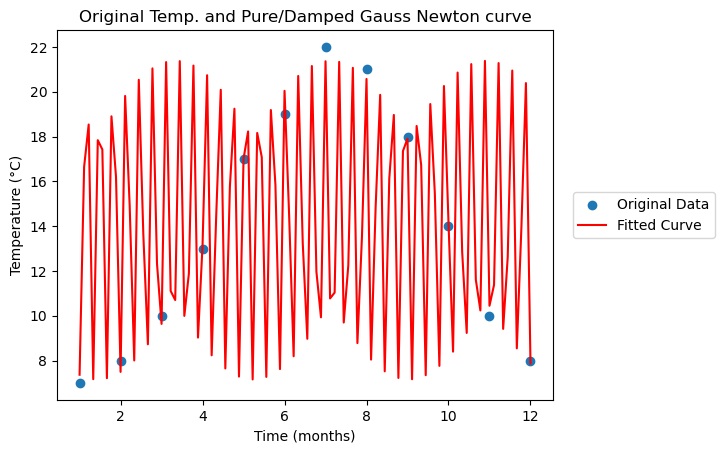

The for method below the iteration stops at: 183


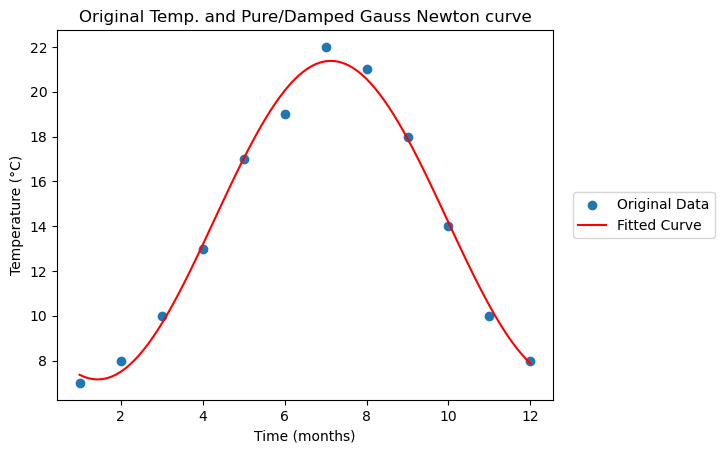

In [26]:
def fit(x, temp, t):
    plt.scatter(t, temp, label='Original Data')
    
    # Time values for the curve
    time_fit = np.linspace(min(t), max(t), 100)
    
    # Compute values
    temp_fit = f(x, time_fit)
    
    plt.plot(time_fit, temp_fit, label='Fitted Curve', color='red')
    plt.xlabel('Time (months)')
    plt.ylabel('Temperature (°C)')
    plt.title('Original Temp. and Pure/Damped Gauss Newton curve')
    plt.legend(loc='center left', bbox_to_anchor=(1.04, 0.5), borderaxespad=0)
    plt.show()

fit(gauss_newtton_or_Damp(x0, temp, t, TOL, Damp=False), temp, t)
fit(gauss_newtton_or_Damp(x0, temp, t, TOL, Damp=True), temp, t)


################################
The for method below the iteration stops at: 8


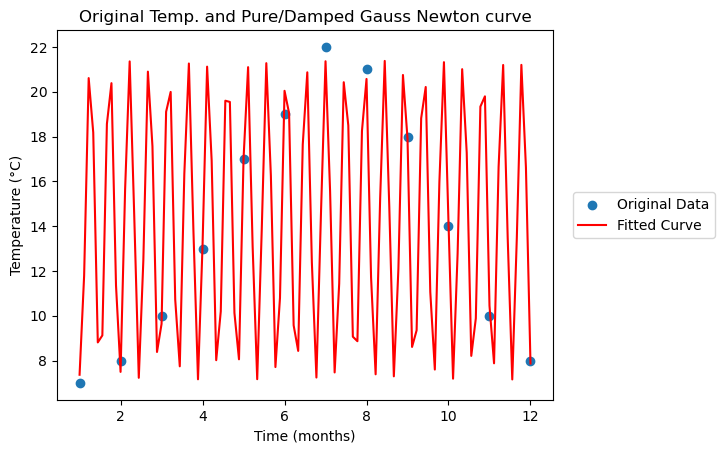

The for method below the iteration stops at: 8
The Gause-N method gives: [ 7.11123395 99.97869546 99.75552235 14.26653268]

################################
The for method below the iteration stops at: 87285


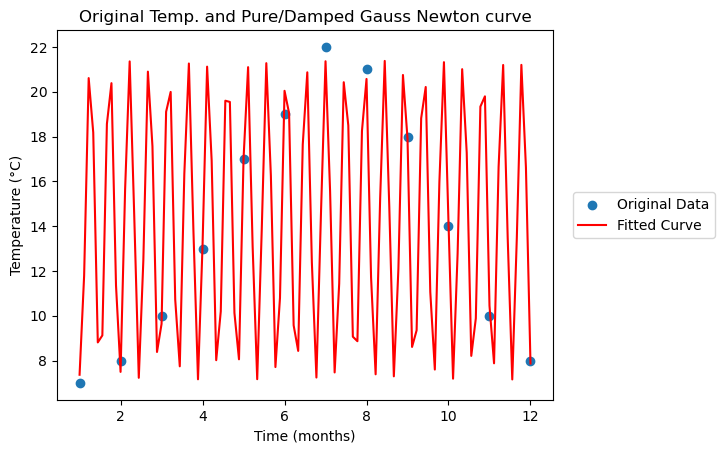

The for method below the iteration stops at: 87285
The Damping Gause-N method gives: [ 7.11123395 99.97869546 99.75552235 14.26653268]

################################


In [28]:
x0 = np.array([100,100,100,100]) 
TOL = 10**(-6)
print("\n################################")
fit(gauss_newtton_or_Damp(x0, temp, t, TOL, Damp=False), temp, t)
print("The Gause-N method gives:", gauss_newtton_or_Damp(x0,temp,t,TOL,Damp=False))
print("\n################################")
fit(gauss_newtton_or_Damp(x0, temp, t, TOL, Damp=True), temp, t)
print("The Damping Gause-N method gives:", gauss_newtton_or_Damp(x0,temp,t,TOL,Damp=True))
print("\n################################")